In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')
#For Who not Using Colab present your file path

In [6]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(df.info())
print(df.describe(include='all'))
#It shows all detailes of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             N

In [10]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [11]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
#checking duplicate values
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


# EDA

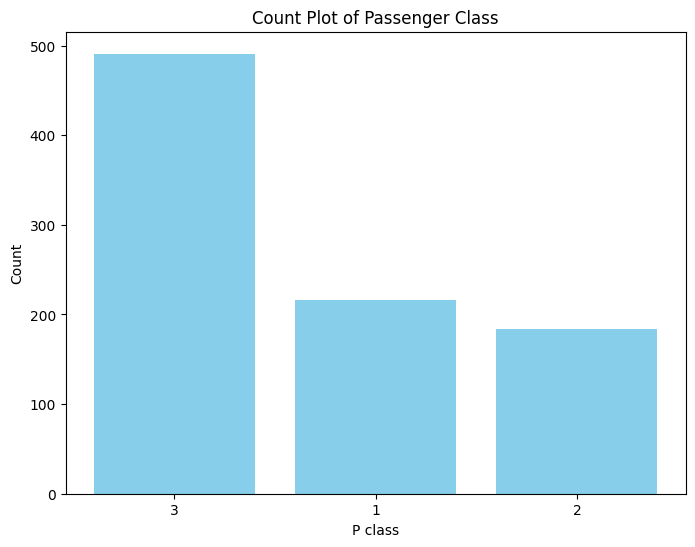

In [17]:
#Passenger Count
pclass_counts = df['Pclass'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(pclass_counts.index.astype(str), pclass_counts, color='skyblue')
plt.title('Count Plot of Passenger Class')
plt.xlabel('P class')
plt.ylabel('Count')
plt.show()

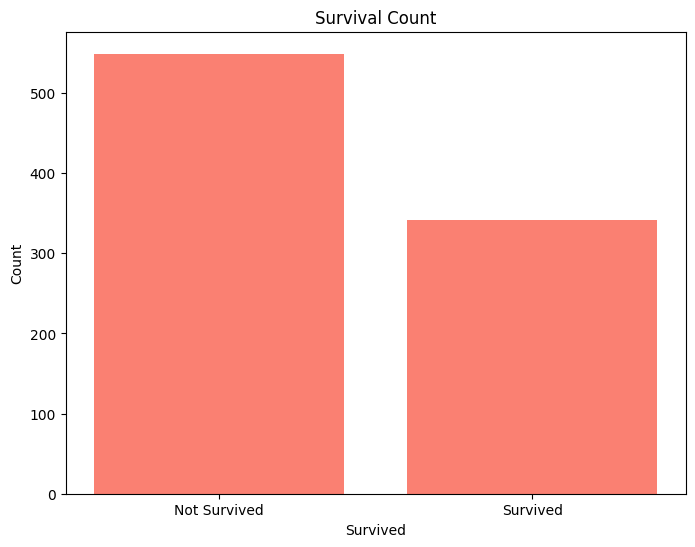

In [18]:
#Surviors Count
survived_counts = df['Survived'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(['Not Survived', 'Survived'], survived_counts.sort_index(), color='salmon')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

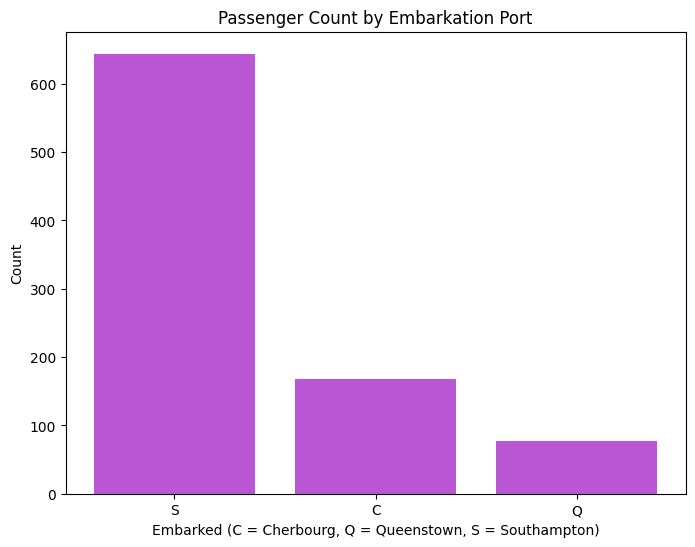

In [19]:
# Count of passengers based on Embarked location (C = Cherbourg, Q = Queenstown, S = Southampton)
embarked_counts = df['Embarked'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(embarked_counts.index, embarked_counts, color='mediumorchid')
plt.title('Passenger Count by Embarkation Port')
plt.xlabel('Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Count')
plt.show()


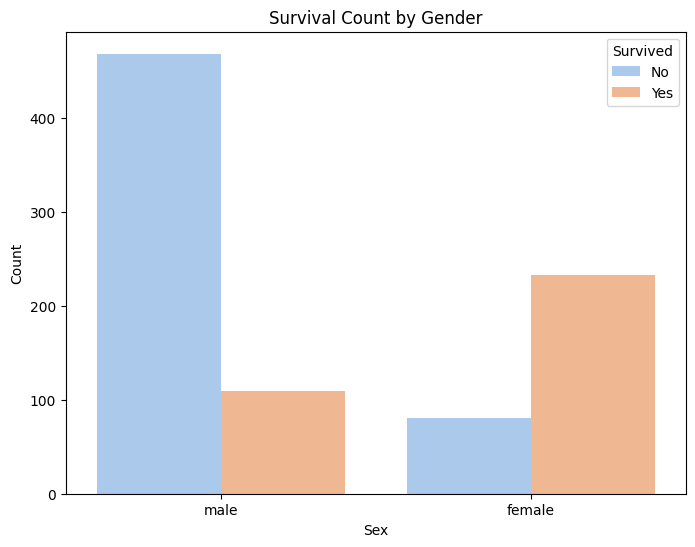

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

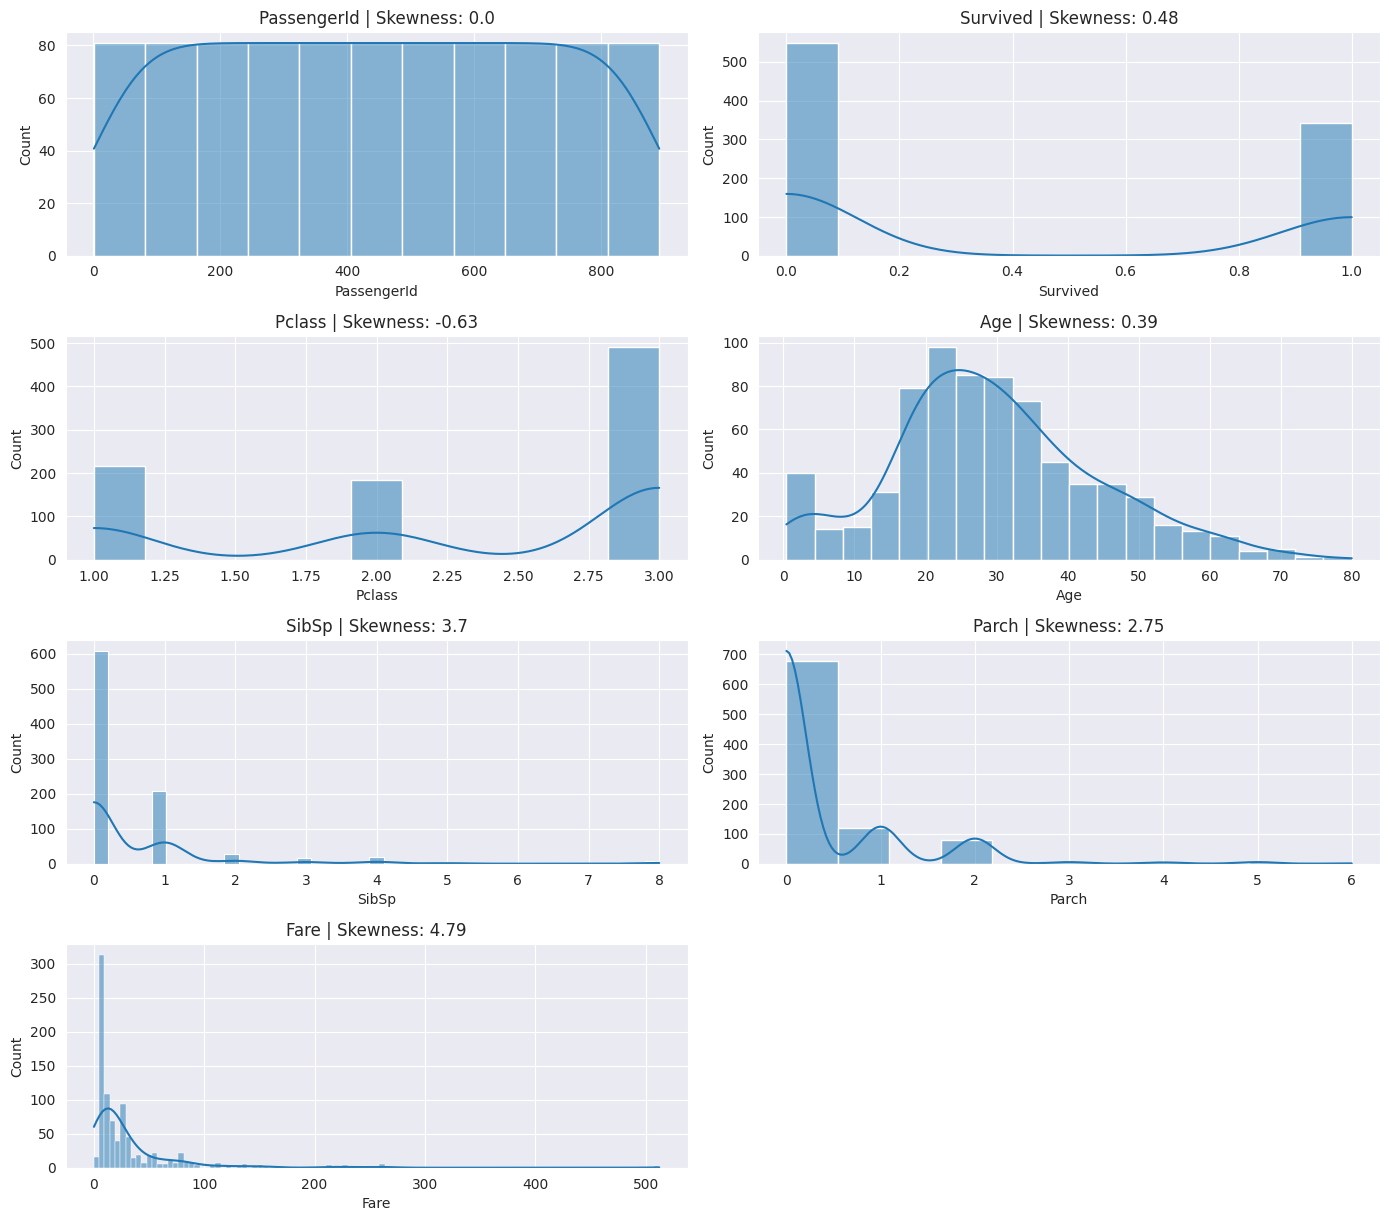

In [24]:
#Kerenal Density Plot
sns.set_style("darkgrid")

# Select only numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Create subplots for each numeric feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)  # histogram + KDE line
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

<ipython-input-25-a0f80c8801b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Pclass", y="Fare", data=df, palette='magma')
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categori

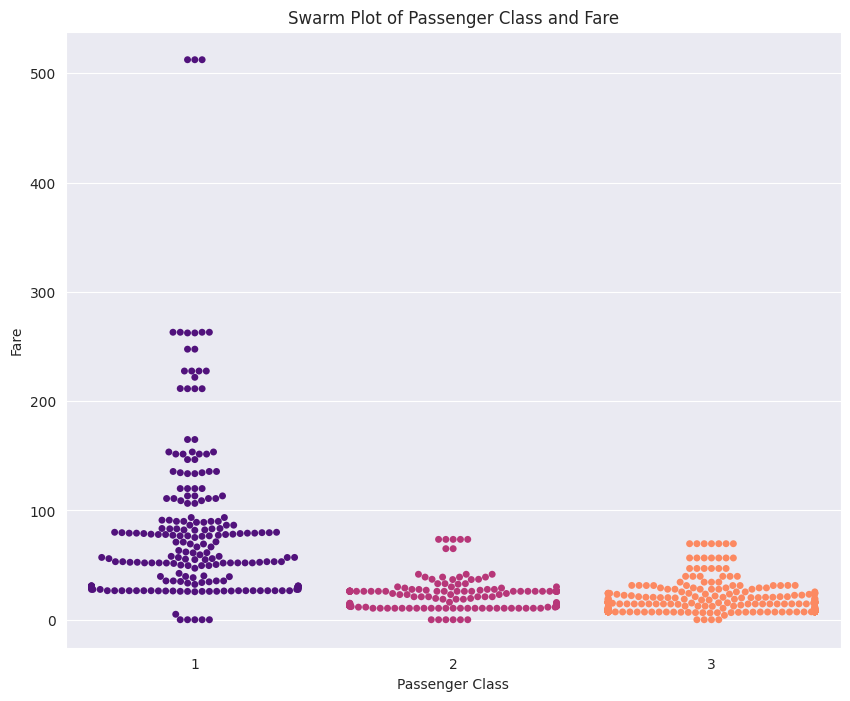

In [25]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x="Pclass", y="Fare", data=df, palette='magma')
plt.title('Swarm Plot of Passenger Class and Fare')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


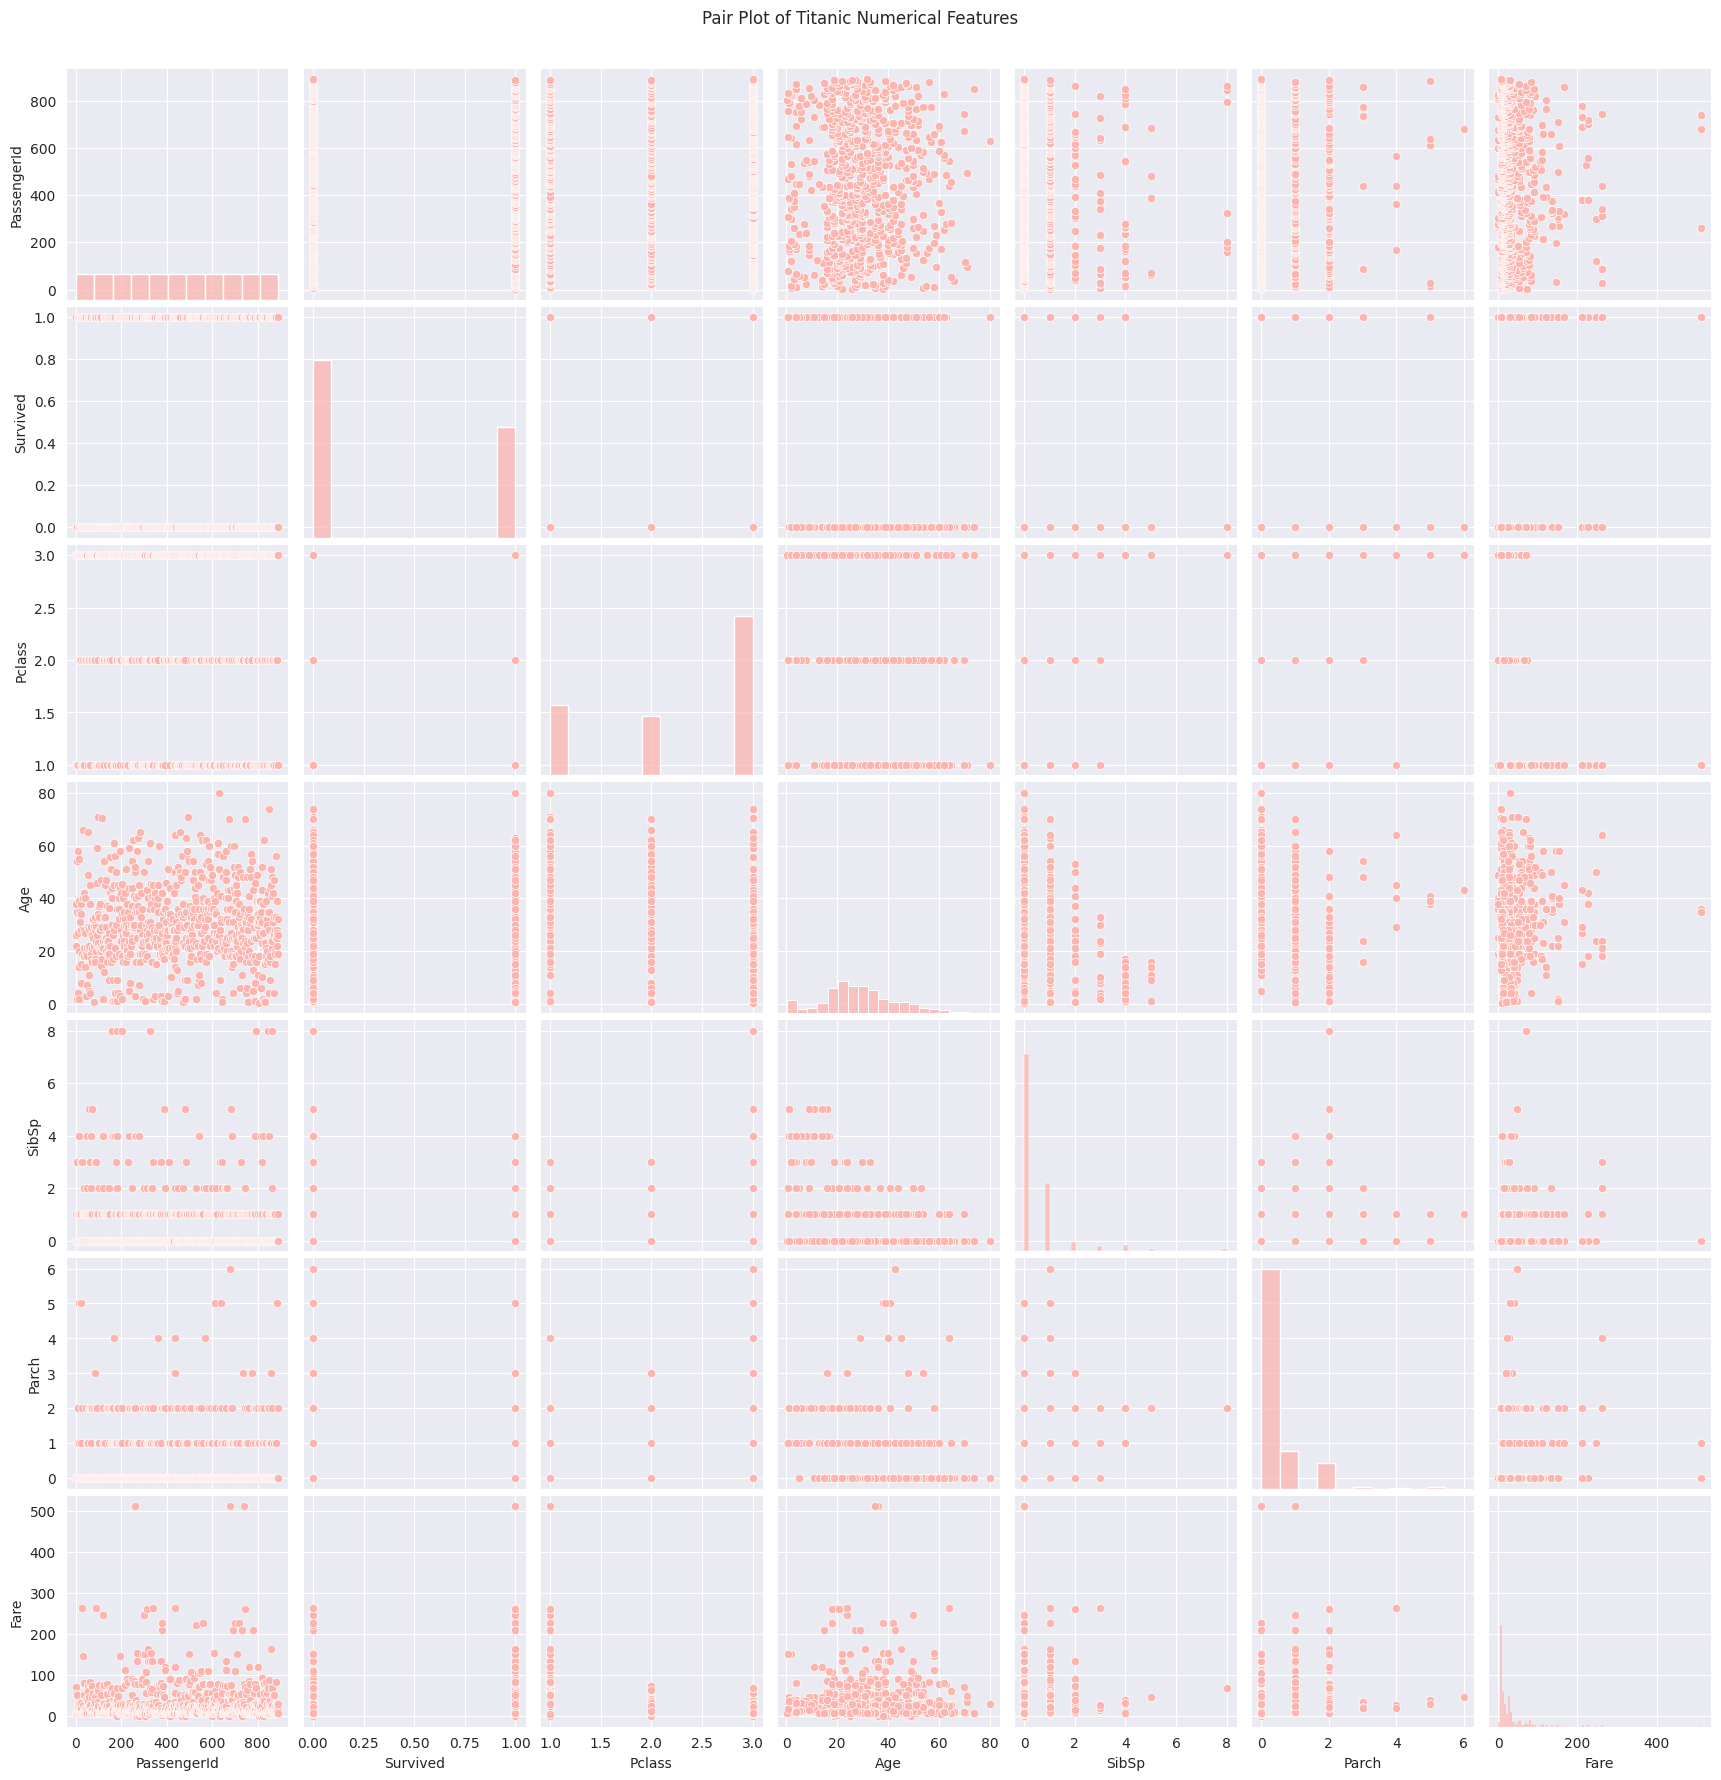

In [26]:
#Bivariate Analysis
sns.set_palette("Pastel1")

# Select only numerical columns for a cleaner pair plot
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create pair plot
pair_plot = sns.pairplot(numeric_df)
pair_plot.fig.suptitle('Pair Plot of Titanic Numerical Features', y=1.02)

plt.show()

<ipython-input-27-b6c23a445f86>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pclass', y='Fare', data=df, palette='coolwarm')


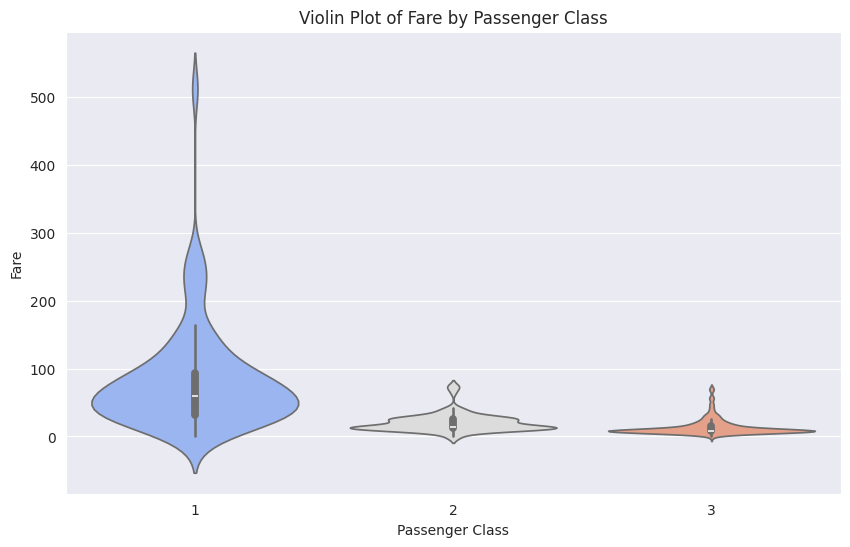

In [27]:
#Violin Plot of Fare Across Passenger Classes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Fare', data=df, palette='coolwarm')

plt.title('Violin Plot of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


<ipython-input-28-8bb878e5b437>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set3')


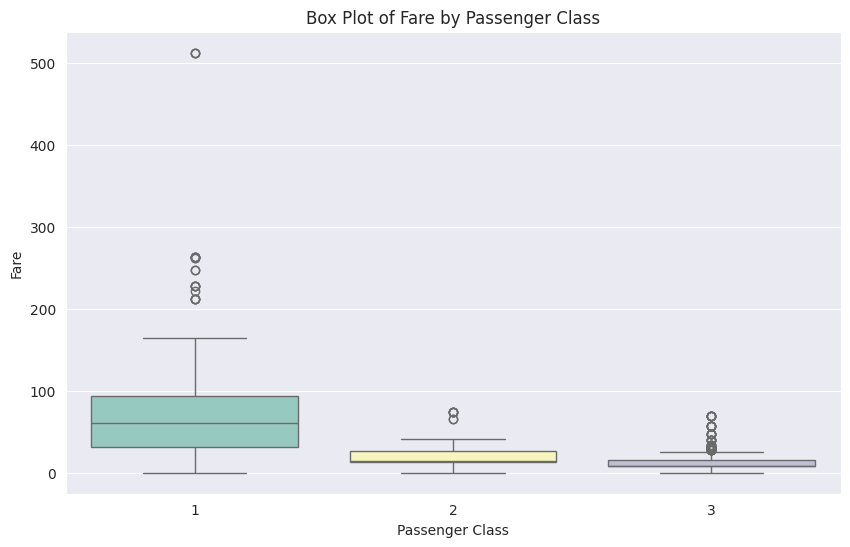

In [28]:
#Box Plot of Fare by Passenger Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set3')

plt.title('Box Plot of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

<ipython-input-29-3e04f4b35325>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='pastel')


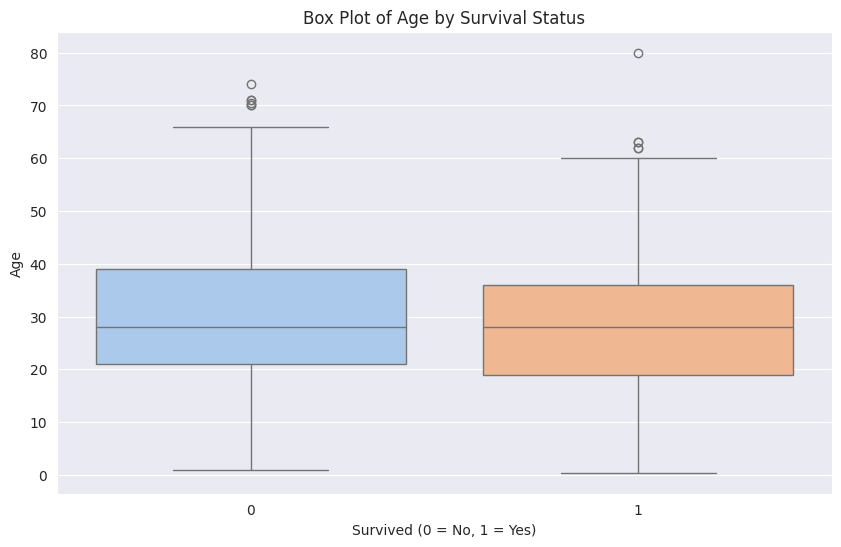

In [29]:
# Age Distribution by Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette='pastel')

plt.title('Box Plot of Age by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

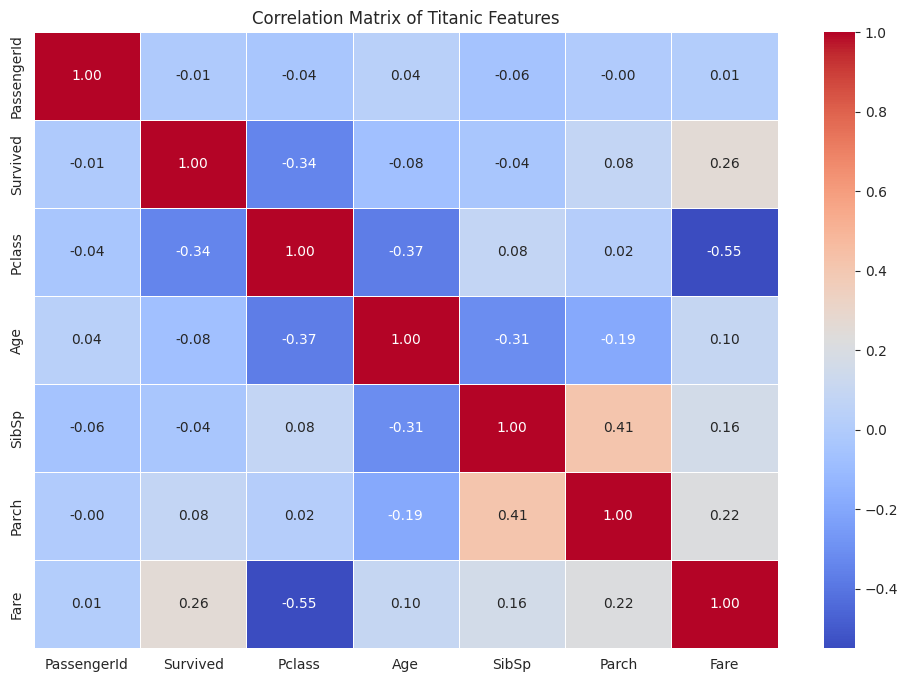

In [31]:
# Calculate the correlation matrix
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])

correlation_matrix = numerical_features.corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and axis labels
plt.title('Correlation Matrix of Titanic Features')
plt.show()